## Exploring Different Stretches and Intervals

In [1]:
from astropy.io import fits
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

from astropy.nddata import Cutout2D
from astropy import wcs
import astropy.units as u
from astropy.coordinates import SkyCoord

In [2]:
folder = 'C:\\Users\\oryan\\Documents\\zoobot_new\\preprocessed-cutouts\\mastDownload\\HST\\'

In [3]:
filename_1 = os.path.join(folder, 'hst_10092_2i_acs_wfc_f814w_j8xi2i\hst_10092_2i_acs_wfc_f814w_j8xi2i_drc.fits')

In [4]:
hdu_1 = fits.open(filename_1)[1]
image_header_1 = fits.open(filename_1)[1].header
image_1_data = fits.open(filename_1)[1].data

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\oryan\\Documents\\zoobot_new\\preprocessed-cutouts\\mastDownload\\HST\\hst_10092_2i_acs_wfc_f814w_j8xi2i\\hst_10092_2i_acs_wfc_f814w_j8xi2i_drc.fits'

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(image_1_data)

NameError: name 'image_1_data' is not defined

<Figure size 720x720 with 0 Axes>

## Looking at Cutouts

In [162]:
coords = SkyCoord(ra=150.7607271 * u.deg, dec=1.7625126 * u.deg, frame='fk5')

In [163]:
cutout = Cutout2D(image_1_data, coords, (300,300), wcs=wcs.WCS(image_header_1), mode='partial')

In [164]:
from astropy.visualization import BaseInterval, ManualInterval, MinMaxInterval, AsymmetricPercentileInterval, PercentileInterval, ZScaleInterval, ImageNormalize
from astropy.visualization import BaseStretch, LinearStretch, SqrtStretch, PowerStretch, PowerDistStretch, SquaredStretch, LogStretch, AsinhStretch, SinhStretch, HistEqStretch, CompositeStretch, ContrastBiasStretch

In [165]:
vmax = np.max(cutout.data)

In [166]:
mean = np.mean(cutout.data/vmax)

In [167]:
std_dev = 0
for i in range(cutout.data.shape[0]):
    for j in range(cutout.data.shape[1]):
        std_dev += ((cutout.data[i,j]/vmax) - mean)**2

In [168]:
RMS_Con = np.sqrt(std_dev / (cutout.data.shape[0]*cutout.data.shape[1]))

In [169]:
RMS_Con

0.000789987061344007

In [198]:
norm = ImageNormalize(cutout.data, interval=ZScaleInterval(nsamples = 10000, contrast = 0.02),stretch=AsinhStretch(), clip=True)

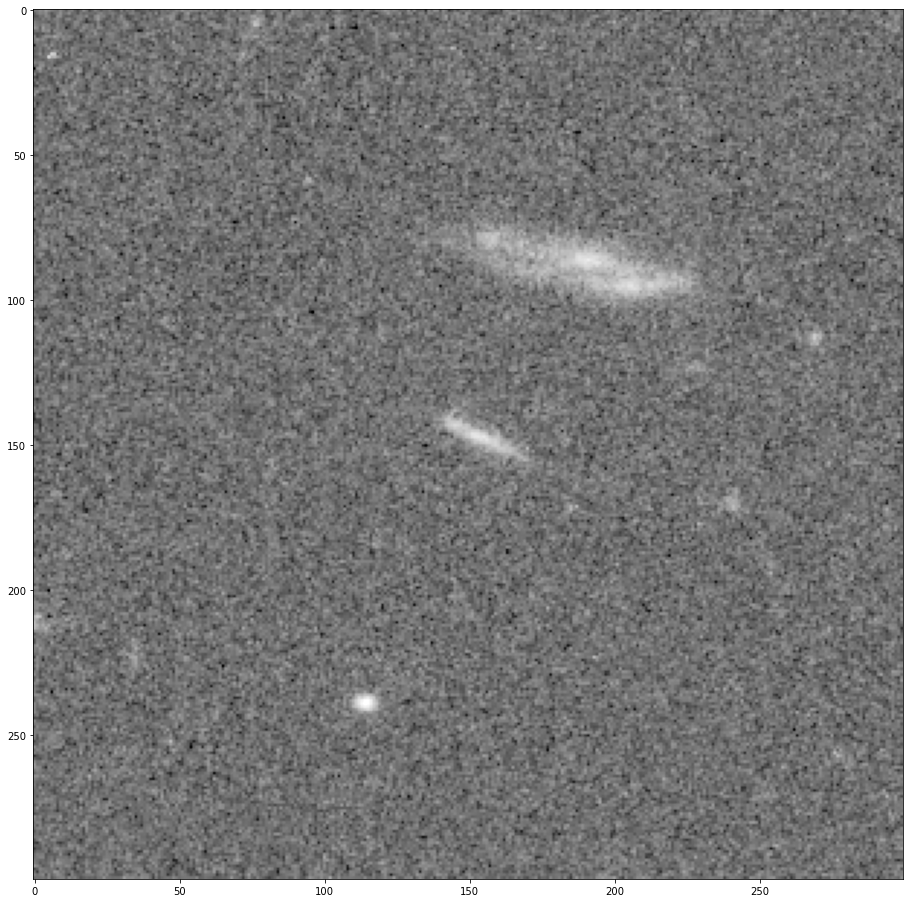

In [199]:
plt.figure(figsize=(16,16))
plt.imshow(cutout.data,cmap='Greys_r',norm=norm)

In [172]:
norm = ImageNormalize(cutout.data, interval=ZScaleInterval(nsamples = 5000, contrast = RMS_Con),stretch=AsinhStretch(), clip=True)

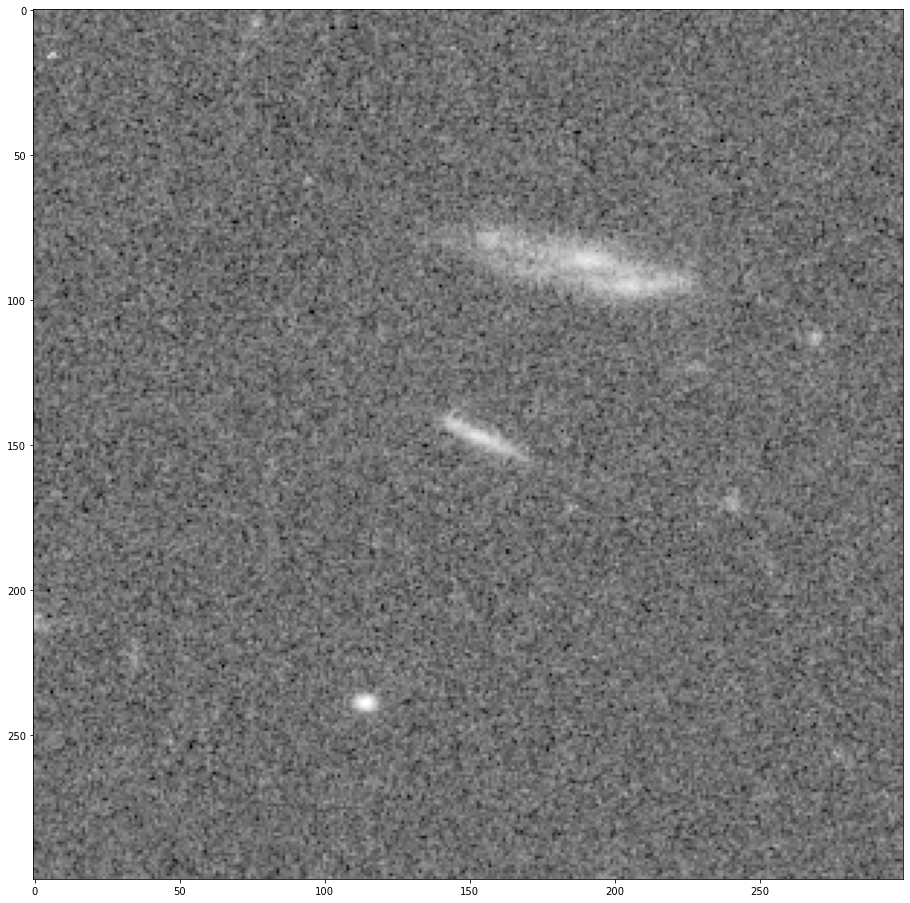

In [173]:
plt.figure(figsize=(16,16))
plt.imshow(cutout.data,cmap='Greys_r',norm=norm)